### Binance Take Home Test - Question 1

In [19]:
#Imports
import numpy as np
import matplotlib.pyplot as plt 

In [31]:
#Functions to evaluate normal distribution pdfs
def _standard_normal_pdf(z: float) -> float:
    """
    Evaluates the standard normal distribution at z
    (i.e mean 0, std 1)

    Parameters:
    z (float): location to evaluate pdf

    Returns:
    float: value of standard normal pdf at z
    """
    return 1/np.sqrt(2*np.pi) * np.exp(-z**2/2)

def normal_pdf(x: float, mu: float, sigma:float) -> float:
    """
    Evaluates a normal distribution with specified mean and
    standard deviation at x
    """
    if sigma < 0:
        raise ValueError("Standard deviation must be > 0")
    
    return 1/sigma * _standard_normal_pdf((x-mu)/sigma)

#Plotting functions
def plot_price_pdf_data(x: np.array, y:np.array) -> tuple:
    fig, ax = plt.subplots()
    ax.set_xlabel('Price / $')
    ax.set_ylabel('p')

    ax.set_xlim(20,75)

    ax.plot(x, y)

    return fig, ax

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Price / $', ylabel='p'>)

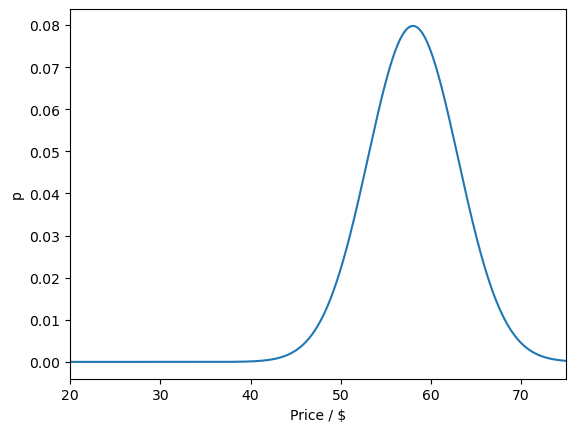

In [32]:
#'Real' price distribution p(x|z=1)
x_line = np.linspace(0, 75, 1000)
real_price_pdf = normal_pdf(x_line, mu=58, sigma=5)

plot_price_pdf_data(x_line, real_price_pdf)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Price / $', ylabel='p'>)

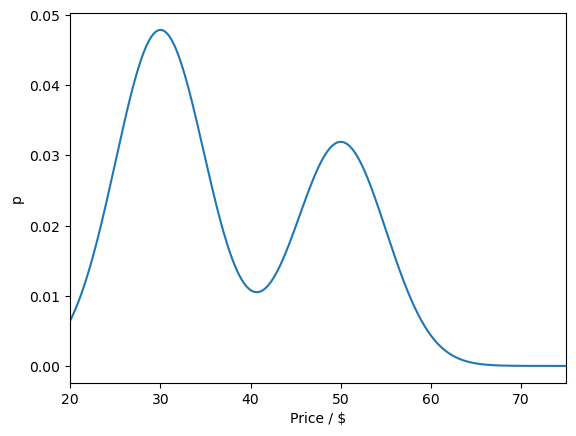

In [62]:
#Fake price distribution p(x|z=0)
fake_price_pdf = 0.6*normal_pdf(x_line, mu=30, sigma=5) + 0.4*normal_pdf(x_line, mu=50, sigma=5)
plot_price_pdf_data(x_line, fake_price_pdf)

Bayes Rule:

$$
P(Z=1|x) = \frac{p(x|Z=1)P(Z=1)}{\sum_{z\in\{0,1\}}p(x|Z=z)P(Z=z)}
$$

In [65]:
def p_real_given_price(x: float) -> float:
    """Calculates probability shoe is genuine
    given price x"""
    real_conditional = normal_pdf(x, 58, 5) #p(x|Z=1)
    fake_conditional = 0.6*normal_pdf(x, 30, 5) + 0.4*normal_pdf(x, 50, 5) #p(x|Z=0)

    p = 0.9*real_conditional/(0.9*real_conditional+0.1*fake_conditional)

    return p

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Price / $', ylabel='p'>)

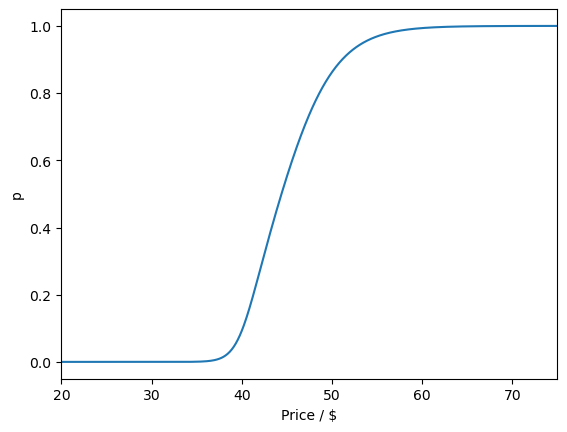

In [66]:
prob_real = p_real_given_price(x_line)
plot_price_pdf_data(x_line, prob_real)